### Финальный проект по предмету "Технологии Машинного Обучения"
##### Работу выполнили:
Косберг Андрей, ИБАС-1-2021

Кузнецов Антон, ИБАС-1-2021

### Постановка задачи
По датасету "ObesityDataSet_raw_and_data_sinthetic" предсказать уровень ожирения человека

#### Описание датасета
Датасет содержит следующий набор фич:
- `Gender` `[Male|Female]` – Пол (мужской или женский);
- `Age` `[<int>]` – Возраст человека (в годах);
- `Height` `[<float>]`  – Рост человека (в метрах);
- `Weight` `[<float>]` – Вес человека (в килограммах);
- `family_history_with_overweight` `[yes|no]` – Есть ли у человека семейная история избыточного веса (да/нет);
- `FAVC` `[yes|no]` – Часто ли человек употребляет высококалорийную пищу (да/нет);
- `FCVC` `[<float>[1.0:3.0]]` – Частота потребления овощей (шкала от 1 до 3);
- `NCP` `[<float>]` – Количество основных приемов пищи в день;
- `CAEC` `[no|Sometimes|Frequently|Always]` – Частота употребления пищи между приемами пищи (никогда, иногда, часто, всегда).
- `SMOKE` `[yes|no]` – Курит ли человек (да/нет).
- `CH2O` `[<float>[1.0:3.0]]` – Суточное потребление воды (шкала от 1 до 3).
- `SCC` `[yes|no]` – Следит ли человек за потреблением калорий (да/нет).
- `FAF` `[<float>[1.0:3.0]]` – Частота физических нагрузок (шкала от 0 до 3).
- `TUE` `[<float>[0.0:3.0]]` – Время, затраченное на использование технологии (шкала от 0 до 3).
- `CALC` `[no|Sometimes|Frequently|Always]` – частота употребления алкоголя (никогда, иногда, часто, всегда).
- `MTRANS` `[Automobile|Bike|MotorbikeFrequently|Public_Transportation|Walking]` – Основной вид транспорта (автомобиль, велосипед, мотоцикл, общественный транспорт, ходьба).

Целевая переменная:

- `NObeyesdad` `[Insufficient_Weight|Normal_Weight|Overweight_Level_I|Overweight_Level_II|Obesity_Type_I|Obesity_Type_II|Obesity_Type_III]` – уровень ожирения (недостаточный вес, нормальный вес, избыточный вес I уровня, избыточный вес II уровня, ожирение I типа, ожирение II типа, ожирение III типа).

In [509]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.cluster import KMeans
#import scikitplot as skplt

In [510]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Разведочный анализ

Посмотрим на датасет

In [511]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


И его размер

In [512]:
df.shape

(2111, 17)

Информация по столбцам

In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Пропущенных значений не обнаружено

Статистика по числовым значениям

In [514]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


И по категориальным

In [515]:
df.describe(include='object')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


Проверим категориальные признаки на соответствие описанию датасета

In [516]:
for i in df.drop(["Age", "Height", "Weight", "NCP", "FCVC", "NCP", "CH2O", "FAF", "TUE"], axis=1):
    print(df[i].unique())

['Female' 'Male']
['yes' 'no']
['no' 'yes']
['Sometimes' 'Frequently' 'Always' 'no']
['no' 'yes']
['no' 'yes']
['no' 'Sometimes' 'Frequently' 'Always']
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


Всё отлично. Взглянем на распределения

Функция для подсчёта категориальных переменных

In [ ]:
def count_values(dataset, cat_variable, order = None):
    ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "white", size = 10)
    
    plt.title(f"Количество элементов в каждой категории {cat_variable}")
    plt.show()

Функция для подсчёта распределений непрерывных переменных

In [518]:
def plot_distribution(dataset, feature):
    plt.hist(dataset[feature], bins = "fd")
    plt.axvline(dataset[feature].mean(), color = "red", label = "mean")
    plt.axvline(dataset[feature].median(), color = "orange", label = "median")
    plt.xlabel(f"{feature}")
    plt.ylabel("Count")
    plt.legend()
    plt.title(f"Распределение значений фичи {feature}")
    plt.show()

Функция для визуализации зависимостей

In [519]:
def cross_plot(dataset, lead_category, sup_category, order = None):
    sns.countplot(x = lead_category, hue = sup_category, data = dataset, order = order, palette = "Blues_r")
    plt.show()

Пол

C:\Users\Антон\AppData\Local\Temp\ipykernel_12704\739356216.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)


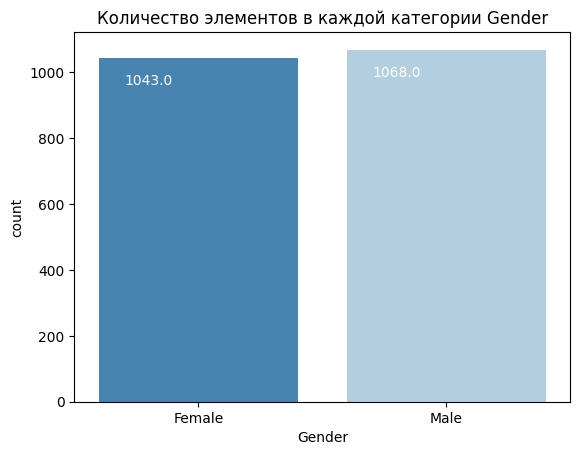

In [520]:
count_values(df, "Gender")

Хороший баланс по полу респондента

Возраст

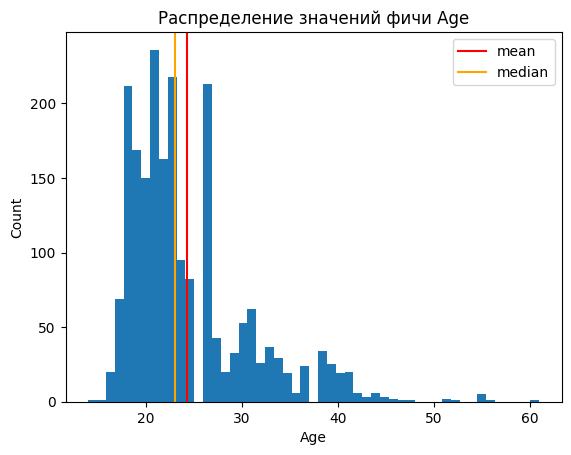

In [521]:
plot_distribution(df, "Age")

Нормального распределения не наблюдается - гистограмма перевешивает влево относительно медианы и среднего

Рост
Ожирение определяется путем вычисления ИМТ, зависящего от роста и веса человека. Точная формула: $ИМТ = \frac{Вес}{Рост^2}$. Таким образом, рост является важным элементом для определения ожирения.

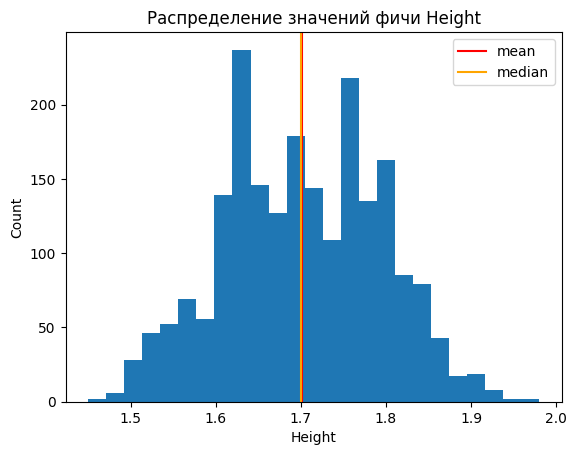

In [522]:
plot_distribution(df, "Height")

Большинство людей имеют рост 1,60 м - 1,85 м. И среднее, и медианное значения составляют около 1,70. Тем не менее, значения роста, похоже, не распределены нормально.

Вес

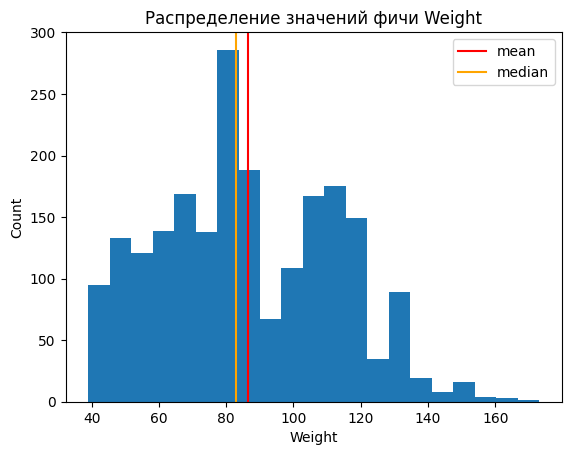

In [523]:
plot_distribution(df, "Weight")

Вес не предлагает интересных наблюдений.Среднее значение и медиана смещены влево из-за большего числа людей с весом 80 кг.

Было бы интересно посмотреть, есть ли какая-либо связь между «Ростом» и «Вес», поскольку обе метрики используются для вычисления «Индекса массы тела».

В строке кода ниже отображены вес и рост каждого человека. Красная линия показывает, что между ними существует положительная корреляция, что означает, что увеличение одной переменной приводит к увеличению другой. Другими словами, более высокие люди с большей вероятностью будут весить больше.

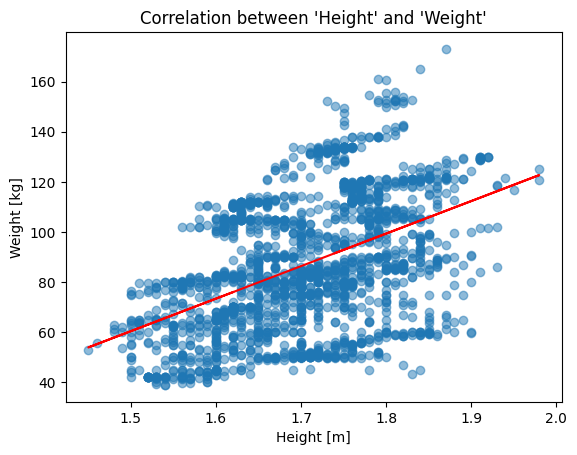

In [524]:
plt.scatter(df["Height"], df["Weight"], alpha = 0.5)
m, b = np.polyfit(df["Height"], df["Weight"], 1)
plt.plot(df["Height"], m * df["Height"] + b, color = "red")

plt.xlabel("Height [m]")
plt.ylabel("Weight [kg]")
plt.title("Correlation between 'Height' and 'Weight'")
plt.show()

Наследственная зависимость

C:\Users\Антон\AppData\Local\Temp\ipykernel_12704\739356216.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)


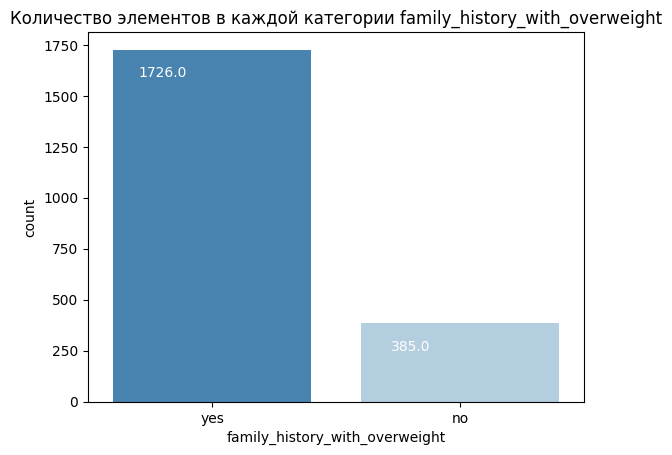

In [525]:
count_values(df, "family_history_with_overweight")

Потребление высококалорийной пищи

C:\Users\Антон\AppData\Local\Temp\ipykernel_12704\739356216.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)


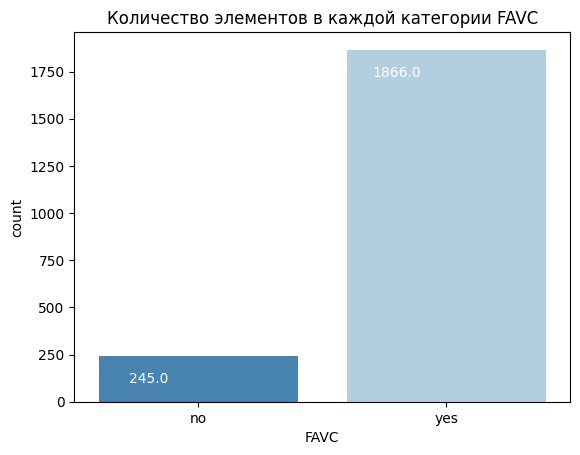

In [526]:
count_values(df, "FAVC")

Потребление овощей

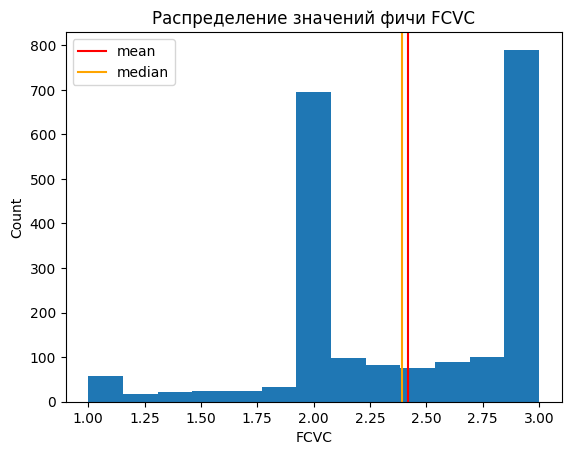

In [527]:
plot_distribution(df, "FCVC")

По всей видимости, чем больше число - тем чаще потребление овощей. Возможно)

Количество приемов пищи в день

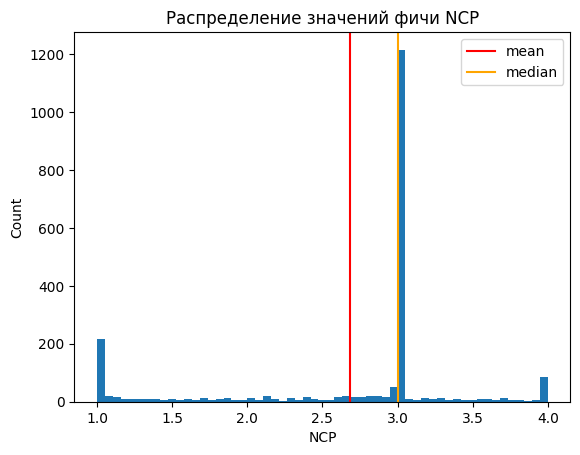

In [528]:
plot_distribution(df, "NCP")

Еда между приемами пищи (перекусы)

C:\Users\Антон\AppData\Local\Temp\ipykernel_12704\739356216.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)


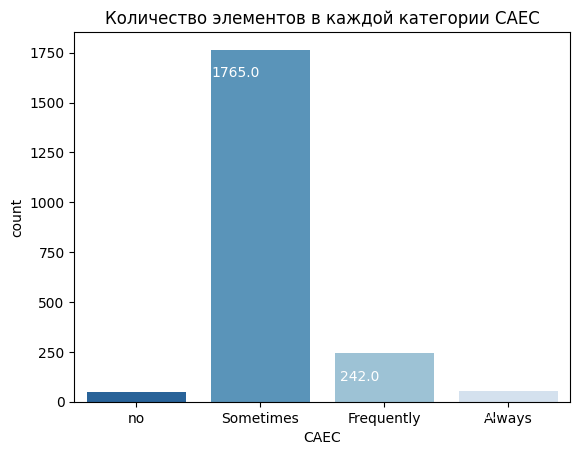

In [529]:
count_values(df, "CAEC", ["no", "Sometimes", "Frequently", "Always"])

Курение

C:\Users\Антон\AppData\Local\Temp\ipykernel_12704\739356216.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)


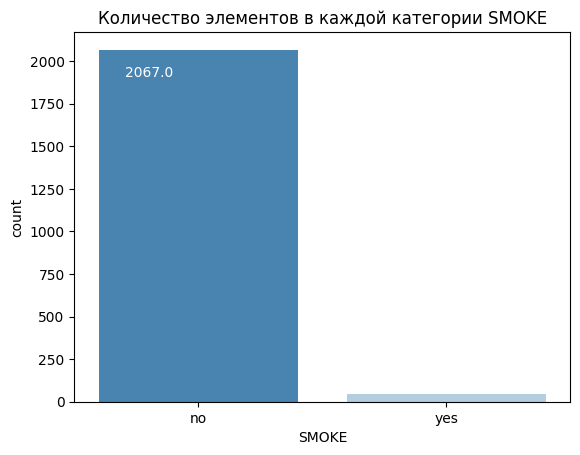

In [530]:
count_values(df, "SMOKE")

Ого, прям вот не курит никто. Да да...

Потребление воды

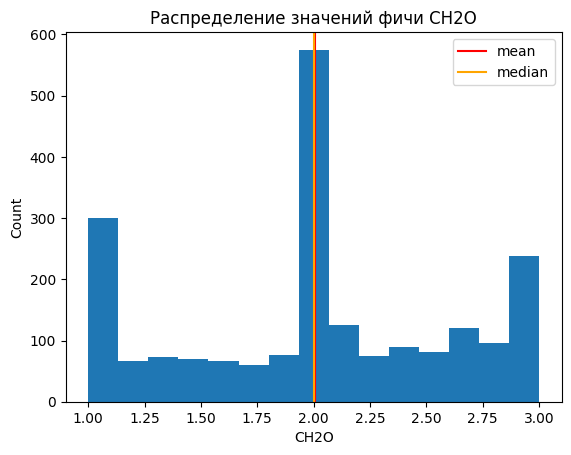

In [531]:
plot_distribution(df, "CH2O")

Ситуация, как и с потреблением овощей. Напрашивается категоризация, а не непрерывная переменная

Отслеживание потребления калорий

C:\Users\Антон\AppData\Local\Temp\ipykernel_12704\739356216.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)


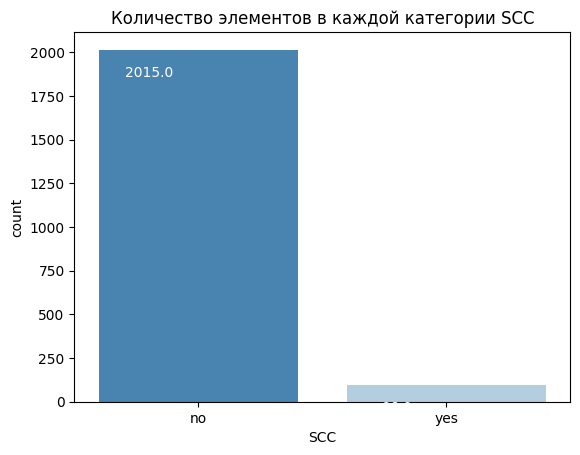

In [532]:
count_values(df, "SCC")

Физическая активность

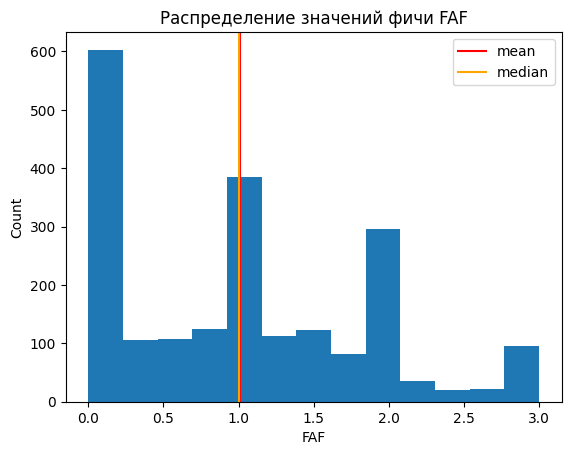

In [533]:
plot_distribution(df, "FAF")

Тоже не подходит непрерывное распределение

Использование гаджетов

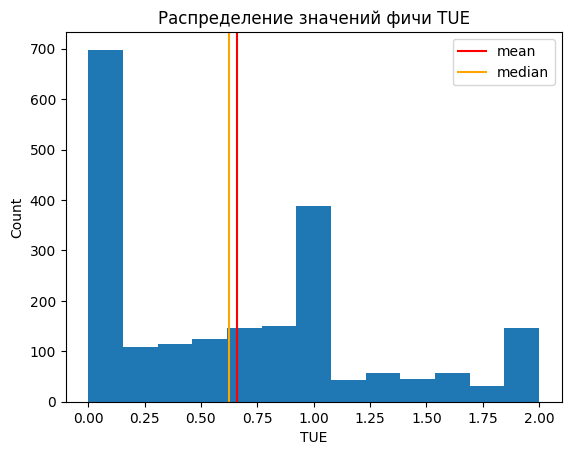

In [534]:
plot_distribution(df, "TUE")

Потребление алкоголя

C:\Users\Антон\AppData\Local\Temp\ipykernel_12704\739356216.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)


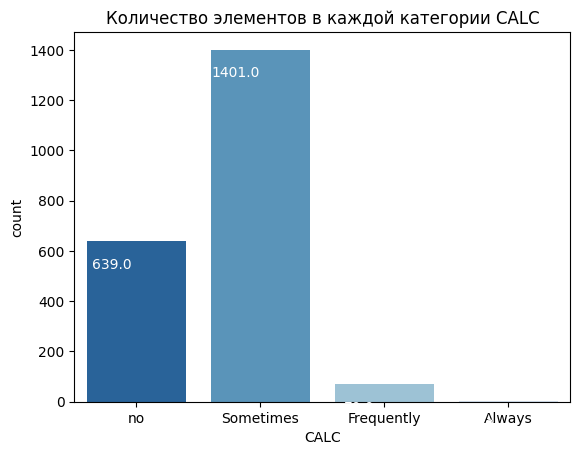

In [535]:
count_values(df, "CALC")

Вид передвижения

C:\Users\Антон\AppData\Local\Temp\ipykernel_12704\739356216.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)


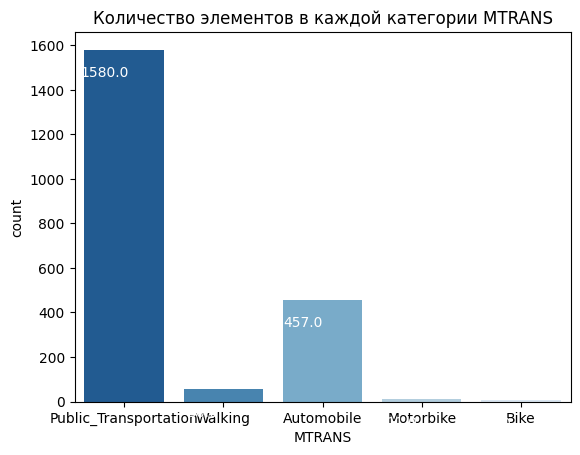

In [536]:
count_values(df, "MTRANS")

Похоже, европейцы какие-то

### Индекс массы тела

Люди, в соответствии с их `индексом массы тела (ИМТ)`, классифицируются как:

* Недостаточный вес, если ИМТ < 18,5
* Нормальный, если ИМТ 18,5 - 24,9
* Избыточный вес, если ИМТ 25,0 - 29,9
* Ожирение I, если ИМТ 30,0 - 34,9
* Ожирение II, если ИМТ от 35,0 до 39,9
* Ожирение III, если ИМТ > 40

Количество людей в каждой категории отображается ниже (примечание: категории упорядочены логически).

График показывает, что набор данных сбалансирован; только класс "Ожирение типа I" немного превосходит другие категории.

C:\Users\Антон\AppData\Local\Temp\ipykernel_12704\739356216.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)


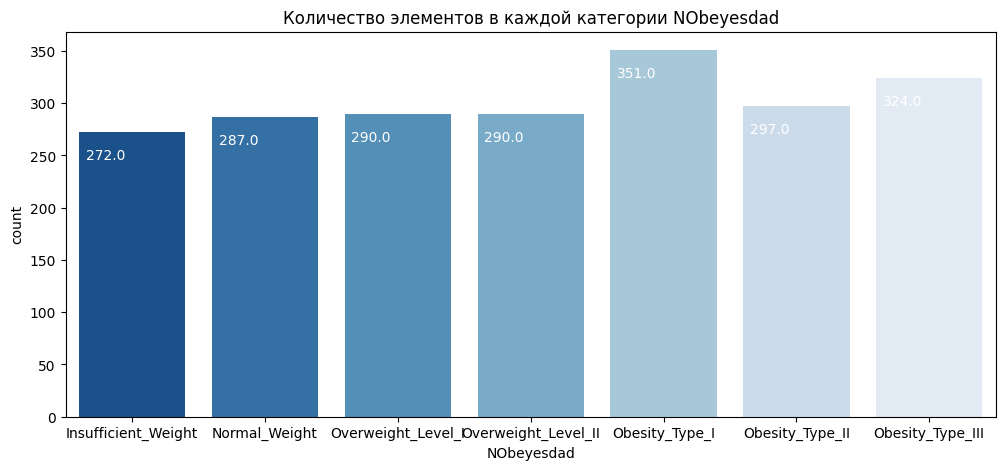

In [537]:
plt.figure(figsize = (12, 5))
count_values(df, "NObeyesdad", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

### Зависимости

Лишний вес от пола

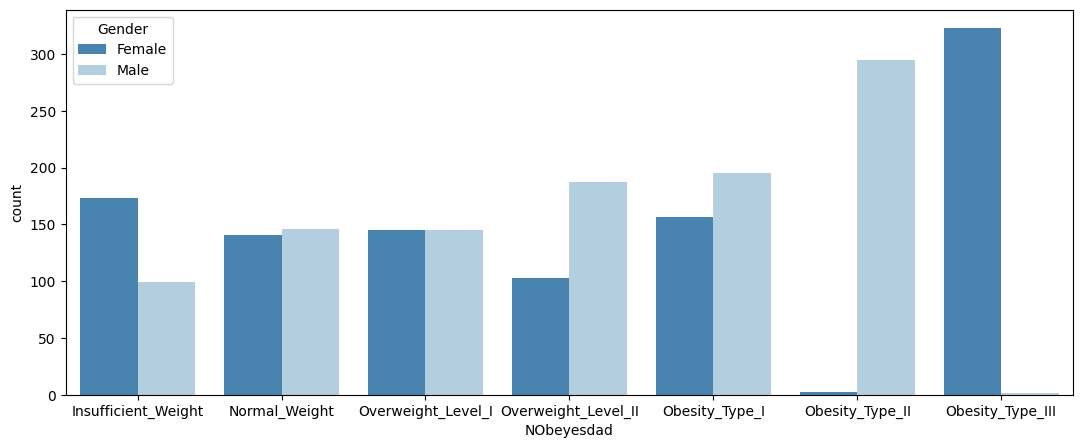

In [538]:
plt.figure(figsize = (13, 5))
cross_plot(df, "NObeyesdad", "Gender", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

Тут всё спокойно. Хотя женщины несколько склонны к радикализму


Лишний вес по наследству

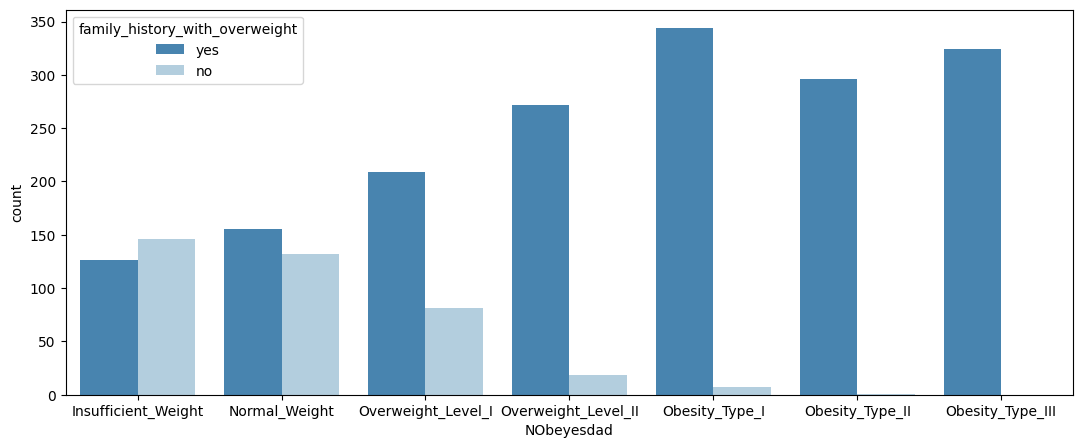

In [539]:
plt.figure(figsize = (13, 5))
cross_plot(df, "NObeyesdad", "family_history_with_overweight", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

Огого! Кажется, ожирение — это семейное. У всех, кто был отнесен к категории с избыточным весом или ожирением, были родственники, страдающие от проблем с весом.

Лишний вес и калорийная пища

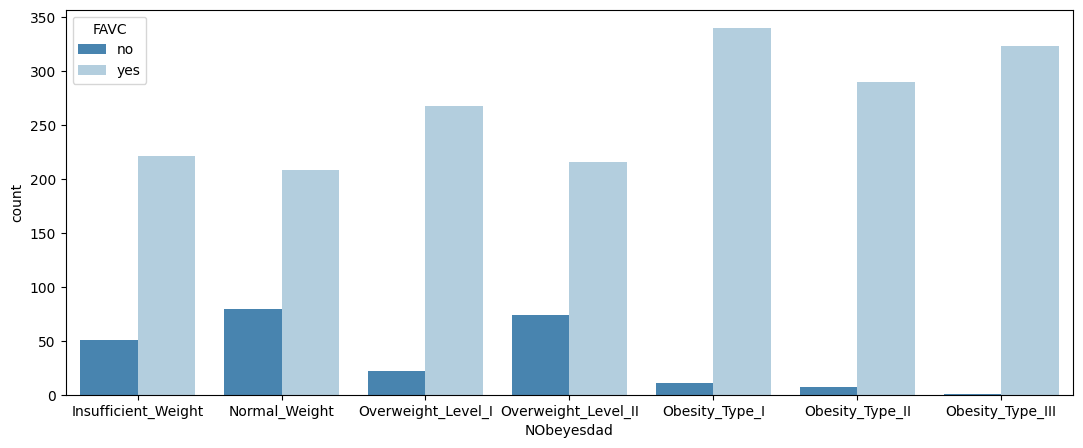

In [540]:
plt.figure(figsize = (13, 5))
cross_plot(df, "NObeyesdad", "FAVC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

Лишний вес и перекусы

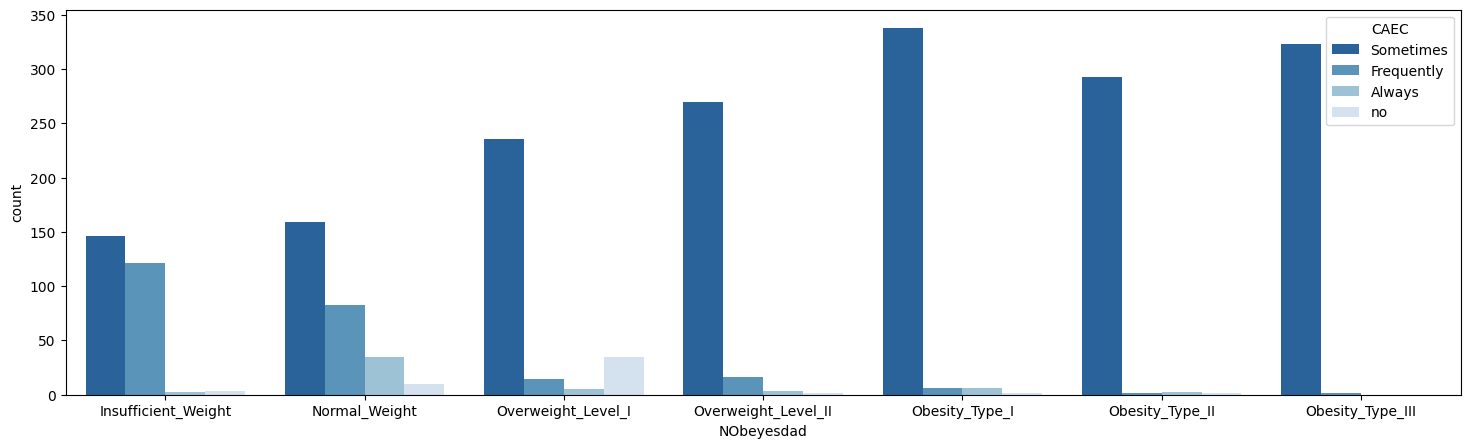

In [541]:
plt.figure(figsize = (18, 5))
cross_plot(df, "NObeyesdad", "CAEC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

Вес тех, кто «часто» или «всегда» получает еду между приемами пищи, не кажется ненормальным. Только люди, перекусывающие время от времени, попадают в категории «Избыточный вес» или «Ожирение».

Лишний вес и курение

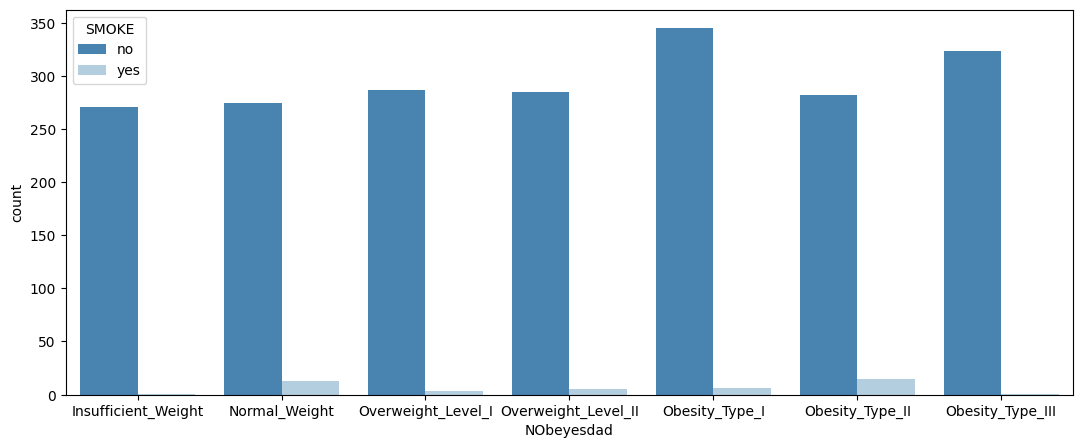

In [542]:
plt.figure(figsize = (13, 5))
cross_plot(df, "NObeyesdad", "SMOKE", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

Похоже, курение не является предиктором или не влияет на вес тела. Существует небольшое количество курильщиков, которые могут быть как c нормальным, так и с избыточным весом.

Лишний вес и отслеживание калорий

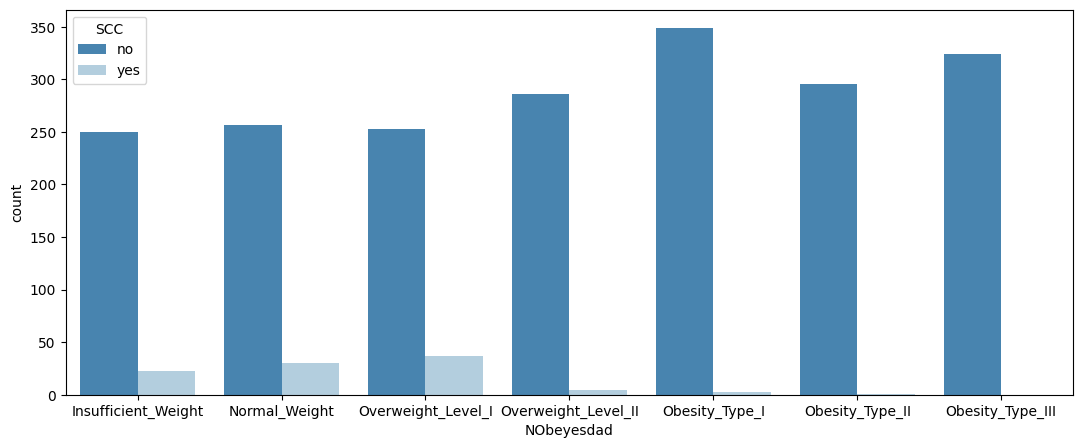

In [543]:
plt.figure(figsize = (13, 5))
cross_plot(df, "NObeyesdad", "SCC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

Люди, которые следят за потреблением калорий, реже набирают лишний вес. Наконец-то всё логично

Лишний вес и алкоголь

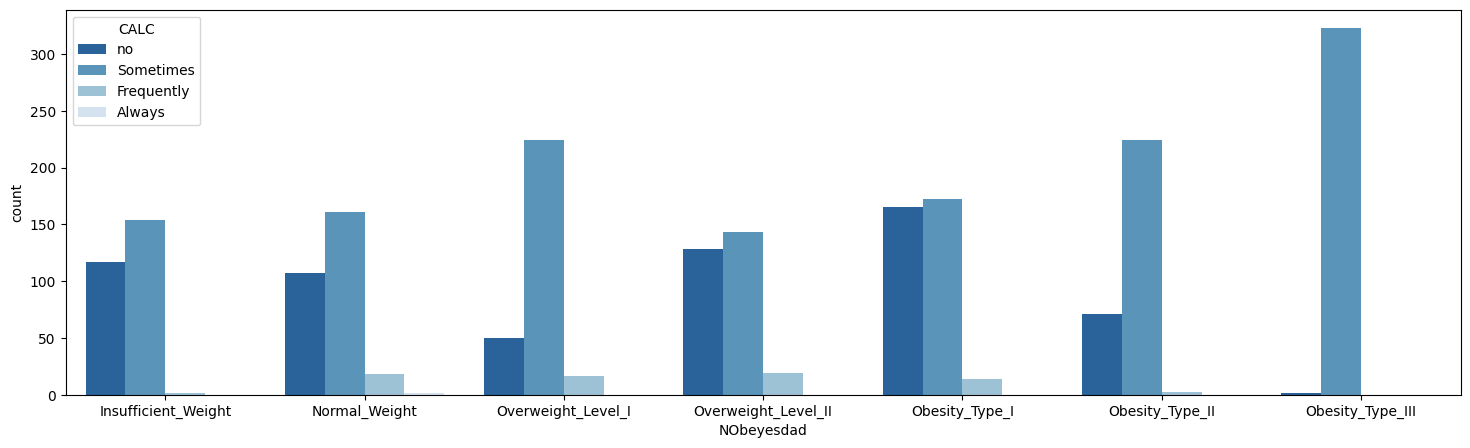

In [544]:
plt.figure(figsize = (18, 5))
cross_plot(df, "NObeyesdad", "CALC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

Возможно, существует слабая связь между алкоголем и ожирением. Данные показывают, что люди, которые «иногда» употребляют алкоголь, могут столкнуться с проблемами веса.

Лишний вес и способ передвижения

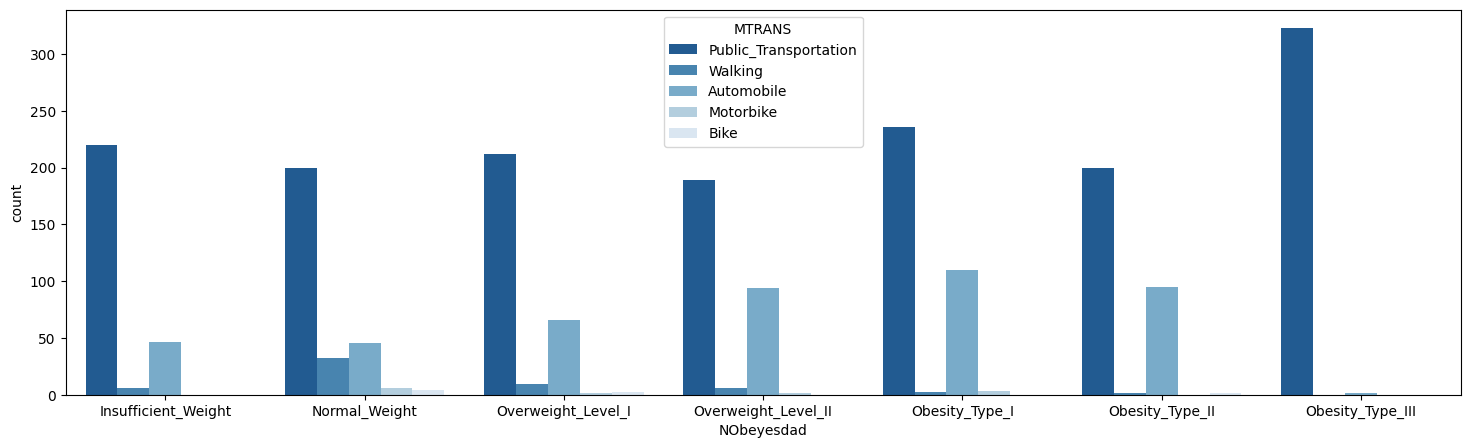

In [545]:
plt.figure(figsize = (18, 5))
cross_plot(df, "NObeyesdad", "MTRANS", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

Транспорт, похоже, не (значительно) влияет на вес человека. Общественным транспортом пользуются как худые, так и нормальные и полные люди; все группы также полагаются на автомобили.

### Корелляция

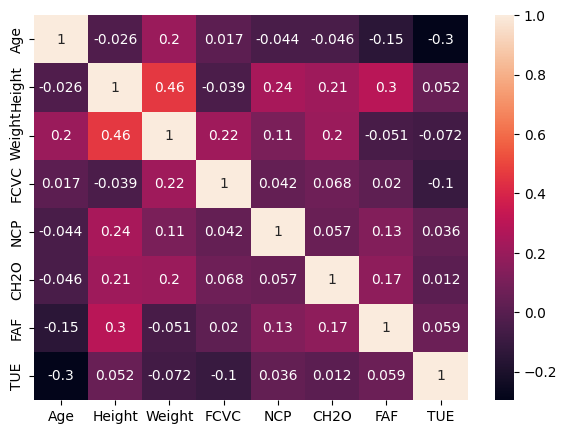

In [546]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(numeric_only = True), annot=True)
plt.show()

### Замена категориальных параметров

In [547]:
dfnum = df[["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]]
dfdum = pd.get_dummies(df[["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]])
dflab = df[["NObeyesdad"]]
dfconc = pd.concat([dfnum, dfdum, dflab], axis = 1)
dfconc.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,21,1.62,64.0,2.0,3.0,2.0,0.0,1.0,True,False,...,False,False,False,True,False,False,False,True,False,Normal_Weight
1,21,1.52,56.0,3.0,3.0,3.0,3.0,0.0,True,False,...,False,False,True,False,False,False,False,True,False,Normal_Weight
2,23,1.80,77.0,2.0,3.0,2.0,2.0,1.0,False,True,...,False,True,False,False,False,False,False,True,False,Normal_Weight
3,27,1.80,87.0,3.0,3.0,2.0,2.0,0.0,False,True,...,False,True,False,False,False,False,False,False,True,Overweight_Level_I
4,22,1.78,89.8,2.0,1.0,2.0,0.0,0.0,False,True,...,False,False,True,False,False,False,False,True,False,Overweight_Level_II


Разделение на фичи и целевую переменную

In [548]:
dfLabel = dfconc["NObeyesdad"]
dfFeatures = dfconc.drop("NObeyesdad", axis = 1)

Подводим все числовые под float64

In [549]:
dfFeatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   int64  
 1   Height                              2111 non-null   float64
 2   Weight                              2111 non-null   float64
 3   FCVC                                2111 non-null   float64
 4   NCP                                 2111 non-null   float64
 5   CH2O                                2111 non-null   float64
 6   FAF                                 2111 non-null   float64
 7   TUE                                 2111 non-null   float64
 8   Gender_Female                       2111 non-null   bool   
 9   Gender_Male                         2111 non-null   bool   
 10  family_history_with_overweight_no   2111 non-null   bool   
 11  family_history_with_overweight_yes  2111 no

In [551]:
dfFeatures = dfFeatures.astype("float")
dfFeatures.dtypes

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
Gender_Female                         float64
Gender_Male                           float64
family_history_with_overweight_no     float64
family_history_with_overweight_yes    float64
FAVC_no                               float64
FAVC_yes                              float64
CAEC_Always                           float64
CAEC_Frequently                       float64
CAEC_Sometimes                        float64
CAEC_no                               float64
SMOKE_no                              float64
SMOKE_yes                             float64
SCC_no                                float64
SCC_yes                           

### Нормализация

In [552]:
dfFeaturesNorm = MinMaxScaler().fit_transform(dfFeatures)
dfFeaturesNorm.min(axis = 1), dfFeaturesNorm.max(axis = 1)

(array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]))

### Кодировка целевой переменной

In [553]:
encoder = LabelEncoder()
encoder.fit(dfLabel)
list(encoder.classes_)

['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II']

In [555]:
dfLabelEnc = encoder.transform(dfLabel)
dfLabelEnc

array([1, 1, 1, ..., 4, 4, 4])

### Разделение на Train/Test
Пропорция 80/20

In [556]:
Xtrain, Xtest, ytrain, ytest = train_test_split(
                dfFeaturesNorm, dfLabelEnc, 
                test_size = 0.2, stratify = dfLabelEnc,
                random_state = 42) # shuffle=True

### Выбор модели (задача классификации)

In [557]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, Xtrain, ytrain, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    model_names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.721524 (0.028582)
LDA: 0.897503 (0.019530)
KNN: 0.778441 (0.029213)
CART: 0.933668 (0.015556)
NB: 0.499408 (0.023515)
SVC: 0.610172 (0.030735)


Выбор - дерево решений!

In [561]:
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(Xtrain, ytrain)
ypred = cart_model.predict(Xtest)

from sklearn.metrics import classification_report, confusion_matrix

### Метрики

              precision    recall  f1-score   support

           0       0.98      0.87      0.92        54
           1       0.86      0.93      0.89        58
           2       0.94      0.94      0.94        70
           3       0.97      0.95      0.96        60
           4       1.00      0.98      0.99        65
           5       0.93      0.95      0.94        58
           6       0.93      0.97      0.95        58

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.95      0.94      0.94       423



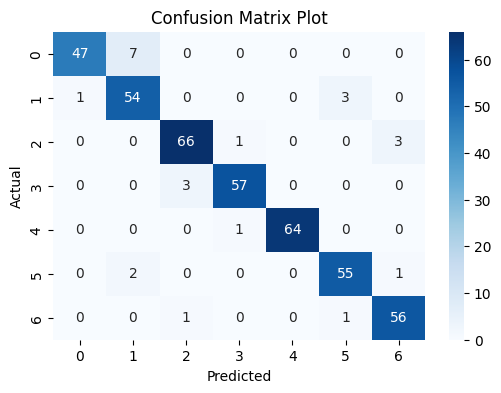

In [ ]:
print(classification_report(ytest, ypred))
conf_matrix = confusion_matrix(ytest, ypred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Plot")
plt.show()

### Визуализация решения

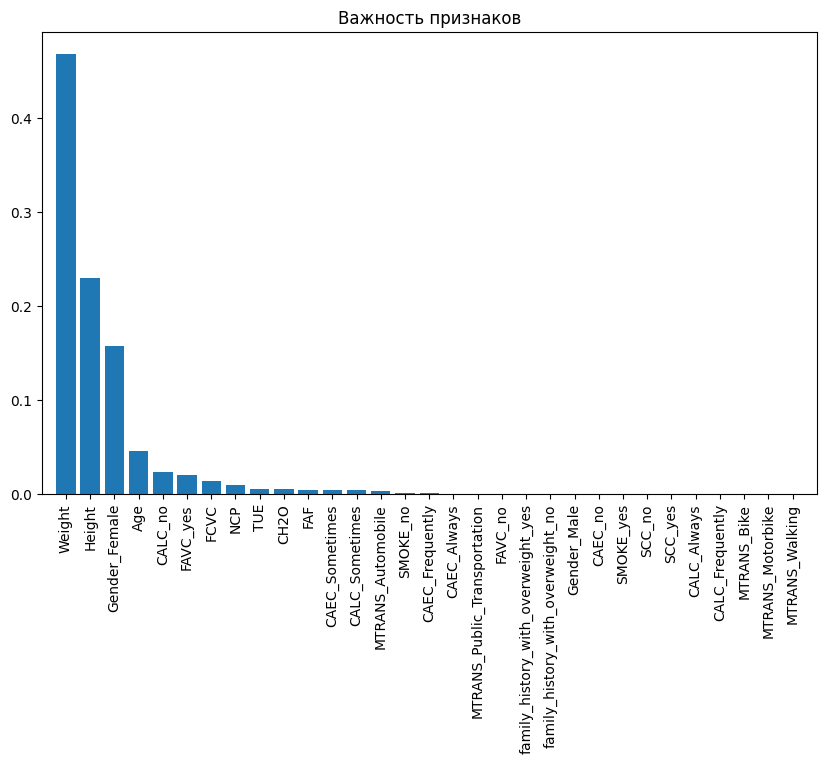

In [563]:
importances = cart_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Важность признаков')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), dfconc.columns[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.show()

### Построение модели без явных признаков

Попробуем построить модель, убрав параметры веса и роста, т.к. предполагается, что по ним напрямую считается степень лишнего веса)

In [568]:
dfFeatures_NoHW = dfFeatures.drop(['Height', 'Weight'], axis=1)
dfFeatures_NoHW.head()


,Age,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,2.0,3.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,21.0,3.0,3.0,3.0,3.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,23.0,2.0,3.0,2.0,2.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27.0,3.0,3.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Нормализация

In [569]:

dfFeaturesNorm_NoHW = MinMaxScaler().fit_transform(dfFeatures_NoHW)
dfFeaturesNorm_NoHW.min(axis = 1), dfFeaturesNorm_NoHW.max(axis = 1)

(array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]))

### Разделение на Train/Test
Пропорция 80/20

In [575]:
Xtrain, Xtest, ytrain, ytest = train_test_split(
                dfFeaturesNorm_NoHW, dfLabelEnc, 
                test_size = 0.2, stratify = dfLabelEnc,
                random_state = 42) # shuffle=True

### Выбор модели (задача классификации)

In [576]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, Xtrain, ytrain, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    model_names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.588243 (0.031023)
LDA: 0.583509 (0.023749)
KNN: 0.744678 (0.033247)
CART: 0.736944 (0.023545)
NB: 0.475106 (0.029341)
SVC: 0.578191 (0.031387)


Выбор - дерево решений!

In [577]:
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(Xtrain, ytrain)
ypred = cart_model.predict(Xtest)

from sklearn.metrics import classification_report, confusion_matrix

### Метрики

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        54
           1       0.56      0.50      0.53        58
           2       0.71      0.76      0.73        70
           3       0.90      0.87      0.88        60
           4       0.97      0.98      0.98        65
           5       0.66      0.64      0.65        58
           6       0.63      0.59      0.61        58

    accuracy                           0.75       423
   macro avg       0.74      0.74      0.74       423
weighted avg       0.74      0.75      0.74       423



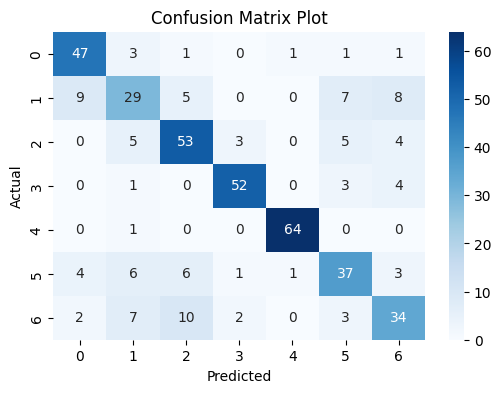

In [578]:
print(classification_report(ytest, ypred))
conf_matrix = confusion_matrix(ytest, ypred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Plot")
plt.show()

### Визуализация решения

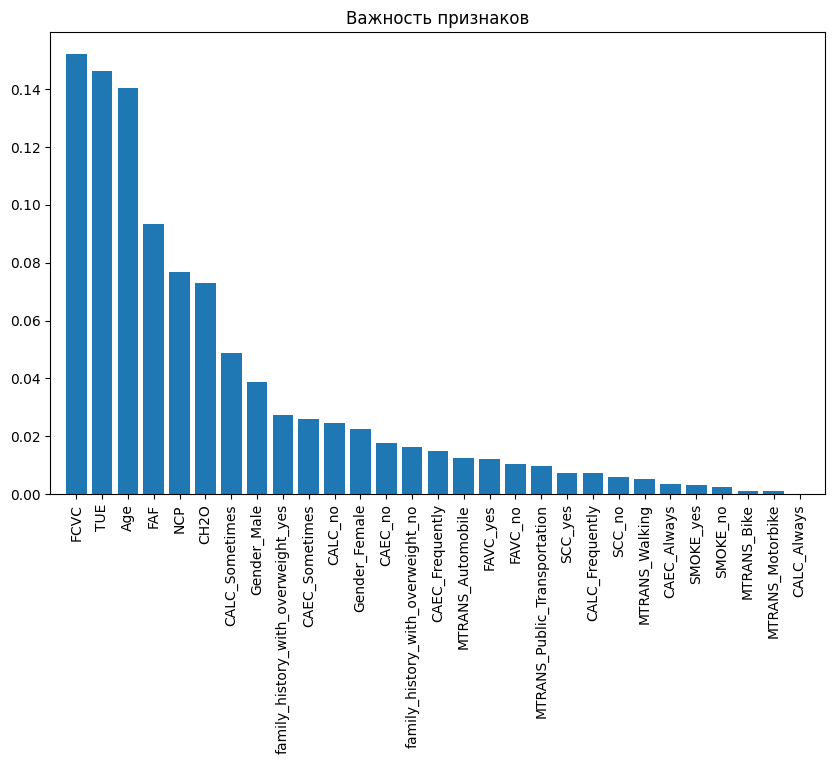

In [581]:
importances = cart_model.feature_importances_
indices = np.argsort(importances)[::-1]


dfconc_NoHW = dfconc.drop(['Weight', 'Height'], axis=1)
plt.figure(figsize=(10, 6))
plt.title('Важность признаков')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), dfconc_NoHW.columns[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.show()

# Вывод

По заданному датасету был произведён подробный разведочный анализ, выделены зависимости целевой переменной от фич. Далее было произведено кодирование категориальных переменных, нормализация и разделение на тренировочную и тестовую выборки. Полсе с помощью кросс-валидационного анализа была выбрана подходящая модель классификации - Дерево Решений. Была построена модель, на которой удалось добиться точности по f1 оценке = 0.94, что является очень хорошим показателем. После была построена визуализация значимости фич для задачи классификации. Самые важные параметры - вес и рост, что логично. Было выдвинуто предположение, что лишний вес считается напрямую из показателя ИМТ. В следствии этого была произведена попытка построить модель, исключив эти два показателя, чтобы предсказание было "настоящим предсказанием". Точность по f2 упала до 75%, что плоховато, но тоже результат, и шанс предсказания довольно высок). Исходя из визуализации видно, что без роста и веса важнейшими факторами являются